# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data

In [2]:
df = pd.read_csv('C:\Saurabh\My phone\datasets\Concrete\concrete.csv')
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
df.shape

(1030, 9)

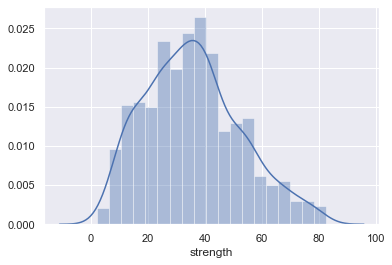

In [5]:
sns.distplot(df['strength'])

## Feature selection

In [7]:
from sklearn.feature_selection import f_regression

In [8]:
f_regression(df.drop('strength', axis = 1), df['strength'])

(array([338.72434101,  19.03395675,  11.62729808,  94.13292299,
        159.0857647 ,  28.74714383,  29.58013   , 124.66983027]),
 array([1.32418331e-65, 1.41356738e-05, 6.75158356e-04, 2.35065465e-21,
        5.13148505e-34, 1.01835134e-07, 6.70411357e-08, 2.10634055e-27]))

In [9]:
p_value = f_regression(df.drop('strength', axis = 1), df['strength'])[1]

In [10]:
p_value.round(3)

array([0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ])

None of the columns had p-values > 0.5, So we wont drop any of them

In [11]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [12]:
df1 = df[(df['slag']>0) & (df['ash']>0) & (df['superplastic']>0)]

In [13]:
df1.shape

(225, 9)

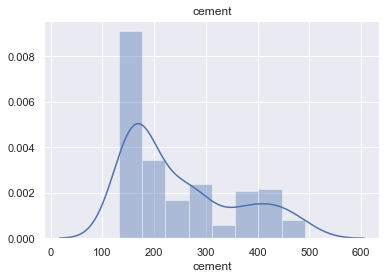

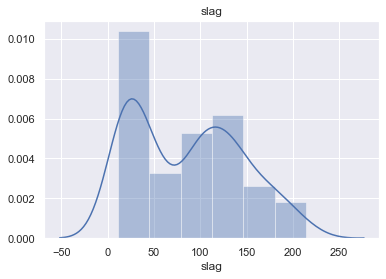

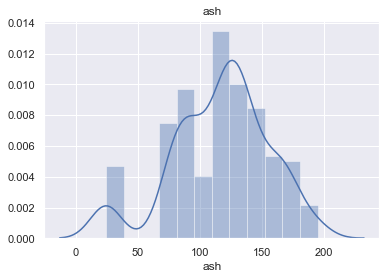

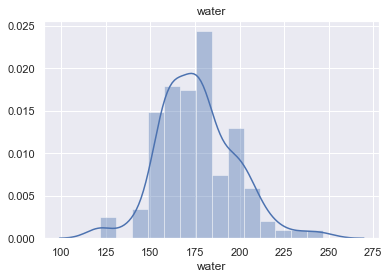

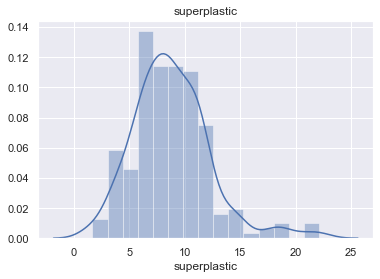

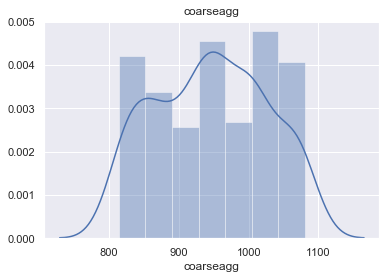

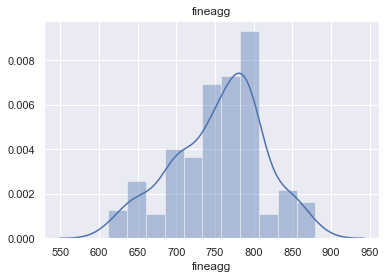

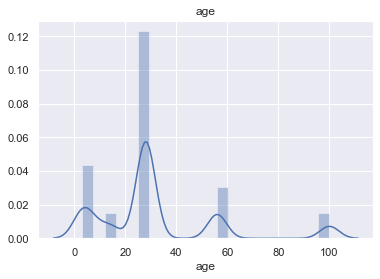

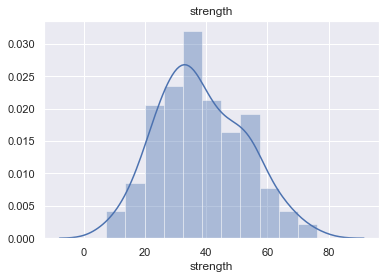

In [14]:
for i in df:
    plt.title(str(i))
    sns.distplot(df1[i])
    plt.show()

In [15]:
x = df1.drop([ 'strength'], axis = 1)
y = df1['strength']

## train-test split

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

# Models

### Linear

In [23]:
reg = LinearRegression()

In [82]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
reg.score(x_test,y_test)

0.6540949462056466

In [84]:
reg.coef_

array([ 0.11015378,  0.115357  ,  0.01406418, -0.10434471,  0.13013237,
        0.01206578,  0.04279735,  0.37357553])

### Decision

In [68]:
dec = DecisionTreeRegressor()

In [85]:
dec.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [86]:
dec.score(x_test, y_test)

0.6807446480418068

### Random

In [71]:
rnd = RandomForestRegressor(n_estimators= 100)

In [87]:
rnd.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [88]:
rnd.score(x_test, y_test)

0.7819586206465535

In [39]:
from sklearn.model_selection import cross_val_score

In [95]:
cross_val = cross_val_score(rnd, x_train, y_train, cv = 5)

In [97]:
cross_val.mean()

0.7807233688090431

In [89]:
y_pred = rnd.predict(x_test)

In [90]:
error = y_test - y_pred

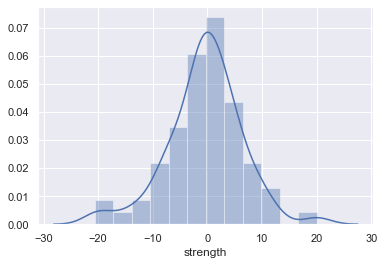

In [91]:
sns.distplot(error)

In [92]:
b = pd.DataFrame()

In [93]:
b['Actual values'] = y_test
b['Predicted values'] = y_pred

In [94]:
b.head()

,Actual values,Predicted values
686,26.15,26.5569
43,23.52,24.5580
412,65.70,65.8281
92,21.50,29.6000
141,30.39,37.9482


## checking which model gives better results with which parameters

In [40]:
from sklearn.model_selection import GridSearchCV

In [43]:
model_params = {
    'linear_regression':{'model': LinearRegression(),
                         'params': {
                             'n_jobs':[1,2,5]
                             }
                        },
    'decision_tree':{'model': DecisionTreeRegressor(),
                    'params':{
                        'criterion' : ["mse", "friedman_mse", "mae"],
                        'splitter' : ["best", "random"]
                            }
                    },
    'random_forest':{'model': RandomForestRegressor(),
                    'params': {
                        'n_estimators': [100,500,1000]
                               }
                    }
}

In [44]:
score = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score= False)
    clf.fit(x_train, y_train)
    score.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_parameters': clf.best_params_
    })

In [45]:
pd.DataFrame(score)

,model,best_score,best_parameters
0,linear_regression,0.610197,{'n_jobs': 1}
1,decision_tree,0.677992,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
2,random_forest,0.766437,{'n_estimators': 100}
